# Gold Price Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [7]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
gold_data.shape

(2290, 6)

In [15]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [19]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [21]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#correlation
1.Postive corrlation
2.Negative correlation

In [26]:
correlation = gold_data.corr()

<ipython-input-26-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


In [27]:
correlation


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

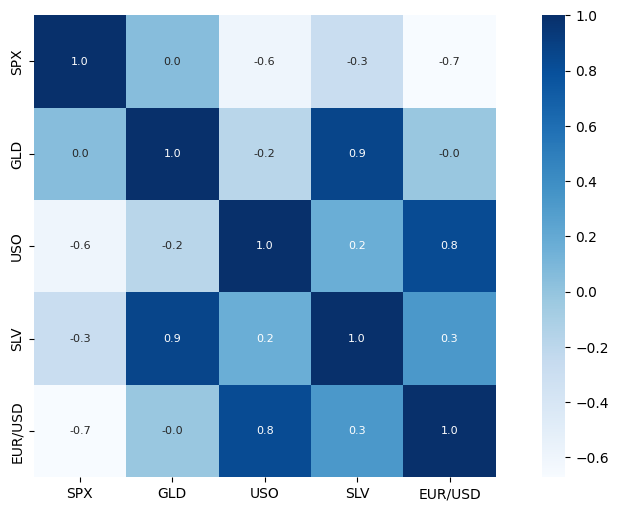

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

In [43]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-44-60fdfdc3fc5a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

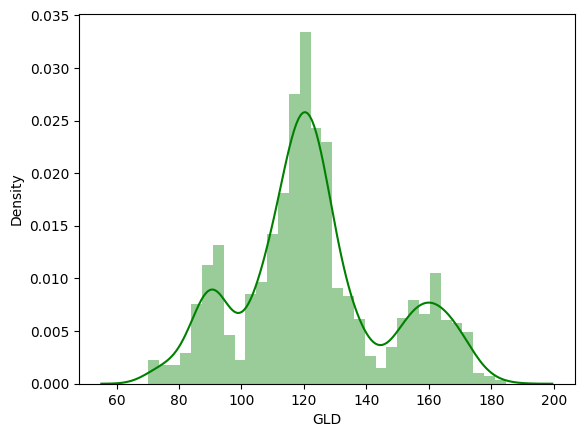

In [44]:
sns.distplot(gold_data['GLD'], color='green')

<Axes: xlabel='GLD', ylabel='Count'>

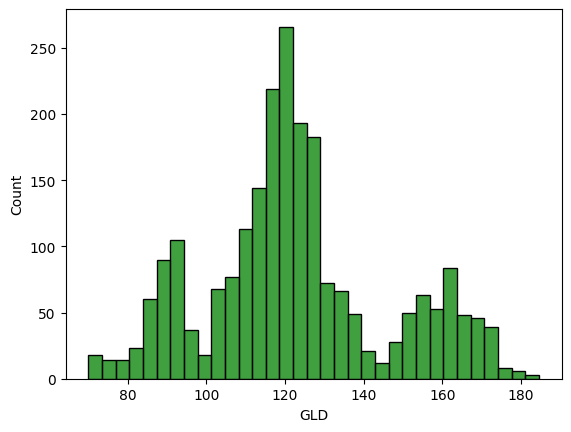

In [64]:
sns.histplot(gold_data['GLD'],color='green')

#Splitting the data

In [46]:
X = gold_data.drop(['Date' , 'GLD'],axis = 1)
Y =gold_data['GLD']

In [47]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [48]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

#Splitting into Training data and Test data

In [51]:
X_train , X_test ,  Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=2)

In [54]:
regressor = RandomForestRegressor(n_estimators = 100)

In [55]:
regressor.fit(X_train , Y_train)

RandomForestRegressor()

In [57]:
test_data_prediction = regressor.predict(X_test)

In [58]:
print(test_data_prediction)

[168.44639953  81.7835     116.08570019 127.45460079 120.8700014
 154.713898   150.30599922 126.16400024 117.51219871 125.92270075
 116.47110132 171.82380064 141.92099873 167.4199976  115.15720004
 118.11530053 138.35730364 170.29310128 160.14150293 162.17479895
 155.19330026 125.06559983 175.77029899 158.12410218 125.27600044
  93.79929929  77.05850034 120.54790018 119.07629928 167.41789961
  88.23009982 125.21959989  91.16350095 117.65110038 121.15079885
 136.08939976 115.48450141 115.11760075 148.83040011 107.13130092
 104.63870229  87.12839788 126.42530047 117.84480035 154.43019908
 119.65640016 108.32629979 107.99069815  93.13160063 127.18609766
  75.31390018 113.61239936 120.9503     111.21979912 118.7785989
 120.56929912 160.4905996  169.26230072 146.95729766  85.77519847
  94.3056002   86.7550991   90.58119994 119.17010069 126.33850079
 127.6025999  170.15049985 122.25209969 117.462499    98.41300017
 168.55500319 143.29189869 131.9564023  121.2742022  121.14949943
 119.6627005

In [60]:
error_score =  metrics.r2_score(Y_test , test_data_prediction)
print("R Squarred error :" , error_score )

R Squarred error : 0.989418808680437


In [61]:
Y_test = list(Y_test)

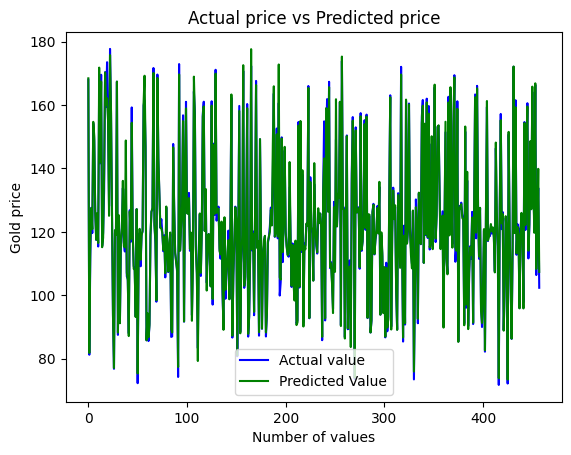

In [62]:
plt.plot(Y_test ,  color ='blue' , label ='Actual value')
plt.plot(test_data_prediction , color ='green' , label = 'Predicted Value')
plt.title("Actual price vs Predicted price")
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()